# İş Problemi
Şirketi terk edecek müşterileri tahmin edebilecek bir makine öğrenmesi modeli
geliştirilmesi istenmektedir. Modeli geliştirmeden önce gerekli olan veri analizi
ve özellik mühendisliği adımlarını gerçekleştirmeniz beklenmektedir.

# Veri Seti Hikayesi
Telco müşteri kaybı verileri, üçüncü çeyrekte Kaliforniya'daki 7043 müşteriye ev telefonu ve İnternet hizmetleri sağlayan hayali
bir telekom şirketi hakkında bilgi içerir. Hangi müşterilerin hizmetlerinden ayrıldığını, kaldığını veya hizmete kaydolduğunu
gösterir.



# Değişkenler
Gender Cinsiyet

SeniorCitizen Müşterinin yaşlı olup olmadığı (1, 0)

Partner Müşterinin bir ortağı olup olmadığı (Evet, Hayır)

Dependents Müşterinin bakmakla yükümlü olduğu kişiler olup olmadığı (Evet, Hayır
tenure Müşterinin şirkette kaldığı ay sayısı

PhoneService Müşterinin telefon hizmeti olup olmadığı (Evet, Hayır)

MultipleLines Müşterinin birden fazla hattı olup olmadığı (Evet, Hayır, Telefon hizmeti yok)

InternetService Müşterinin internet servis sağlayıcısı (DSL, Fiber optik, Hayır)

OnlineSecurity Müşterinin çevrimiçi güvenliğinin olup olmadığı (Evet, Hayır, İnternet hizmeti yok)

OnlineBackup Müşterinin online yedeğinin olup olmadığı (Evet, Hayır, İnternet hizmeti yok)

DeviceProtection Müşterinin cihaz korumasına sahip olup olmadığı (Evet, Hayır, İnternet hizmeti yok)

TechSupport Müşterinin teknik destek alıp almadığı (Evet, Hayır, İnternet hizmeti yok)
StreamingTV Müşterinin TV yayını olup olmadığı (Evet, Hayır, İnternet hizmeti yok)
StreamingMovies Müşterinin film akışı olup olmadığı (Evet, Hayır, İnternet hizmeti yok)

Contract Müşterinin sözleşme süresi (Aydan aya, Bir yıl, İki yıl)

PaperlessBilling Müşterinin kağıtsız faturası olup olmadığı (Evet, Hayır)
PaymentMethod Müşterinin ödeme yöntemi (Elektronik çek, Posta çeki, Banka havalesi (otomatik), Kredi kartı (otomatik))

MonthlyCharges Müşteriden aylık olarak tahsil edilen tutar

TotalCharges Müşteriden tahsil edilen toplam tutar

Churn Müşterinin kullanıp kullanmadığı (Evet veya Hayır)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestClassifier

pd.set_option('expand_frame_repr', True)
pd.set_option("display.max_rows", 999)
pd.set_option('max_colwidth',100)

# Görev 1
Adım 1: Genel resmi inceleyiniz.


In [2]:
df = pd.read_csv('Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
def checkDf(dataframe, head = 8):
  print("##### Shape #####")
  print(dataframe.shape)
  print("\n##### Types #####")
  print(dataframe.dtypes)
  print("\n##### Tail #####")
  print(dataframe.tail(head))
  print("\n##### Head #####")
  print(dataframe.head(head))
  print("\n##### Null Analysis #####")
  print(dataframe.isnull().sum())
  print("\n##### Quantiles #####")
  print(dataframe.describe([0,0.05, 0.50, 0.95, 0.99, 1]).T)    

In [4]:
checkDf(df)

##### Shape #####
(7043, 21)

##### Types #####
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

##### Tail #####
      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
7035  8456-QDAVC    Male              0      No         No      19   
7036  7750-EYXWZ  Female              0      No         No      12   
7037  2569-WGERO  Female              0      No         No      72   
7038  6840-RESVB    Male              0     Yes     

In [5]:

df.columns = [col.upper() for col in df.columns]
df

,CUSTOMERID,GENDER,SENIORCITIZEN,PARTNER,DEPENDENTS,TENURE,PHONESERVICE,MULTIPLELINES,INTERNETSERVICE,ONLINESECURITY,...,DEVICEPROTECTION,TECHSUPPORT,STREAMINGTV,STREAMINGMOVIES,CONTRACT,PAPERLESSBILLING,PAYMENTMETHOD,MONTHLYCHARGES,TOTALCHARGES,CHURN
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


Adım 2: Numerik ve kategorik değişkenleri yakalayınız.


In [6]:
def grabColNames(dataframe, catTh=10, carTh=20):
    """

    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.
    Not: Kategorik değişkenlerin içerisine numerik görünümlü kategorik değişkenler de dahildir.

    Parameters
    ------
        dataframe: dataframe
                Değişken isimleri alınmak istenilen dataframe
        catTh: int, optional
                numerik fakat kategorik olan değişkenler için sınıf eşik değeri
        carTh: int, optinal
                kategorik fakat kardinal değişkenler için sınıf eşik değeri

    Returns
    ------
        catCols: list
                Kategorik değişken listesi
        numCols: list
                Numerik değişken listesi
        catButCar: list
                Kategorik görünümlü kardinal değişken listesi

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grabColNames(df))


    Notes
    ------
        catCols + numCols + catButCar = toplam değişken sayısı
        numButCat catCols'un içerisinde.
        Return olan 3 liste toplamı toplam değişken sayısına eşittir: catCols + numCols + catButCar = değişken sayısı

    """

    # catCols, catButCar
    catCols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    numButCat = [col for col in dataframe.columns if dataframe[col].nunique() < catTh and
                 dataframe[col].dtypes != "O"]
    catButCar = [col for col in dataframe.columns if dataframe[col].nunique() > carTh and
                 dataframe[col].dtypes == "O"]
    catCols = catCols + numButCat
    catCols = [col for col in catCols if col not in catButCar]

    # numCols
    numCols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    numCols = [col for col in numCols if col not in numButCat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'catCols: {len(catCols)}')
    print(f'numCols: {len(numCols)}')
    print(f'catButCar: {len(catButCar)}')
    print(f'numButCat: {len(numButCat)}')
    return catCols, numCols, catButCar


catCols, numCols, catButCar = grabColNames(df)

Observations: 7043
Variables: 21
catCols: 17
numCols: 2
catButCar: 2
numButCat: 1


Adım 3: Numerik ve kategorik değişkenlerin analizini yapınız.


TENURE:
count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
5%          1.000000
10%         2.000000
20%         6.000000
30%        12.000000
40%        20.000000
50%        29.000000
60%        40.000000
70%        50.000000
80%        60.000000
90%        69.000000
95%        72.000000
99%        72.000000
100%       72.000000
max        72.000000
Name: TENURE, dtype: float64


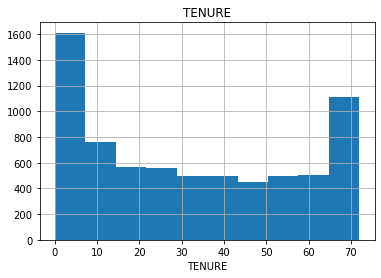

MONTHLYCHARGES:
count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
5%         19.650000
10%        20.050000
20%        25.050000
30%        45.850000
40%        58.830000
50%        70.350000
60%        79.100000
70%        85.500000
80%        94.250000
90%       102.600000
95%       107.400000
99%       114.729000
100%      118.750000
max       118.750000
Name: MONTHLYCHARGES, dtype: float64


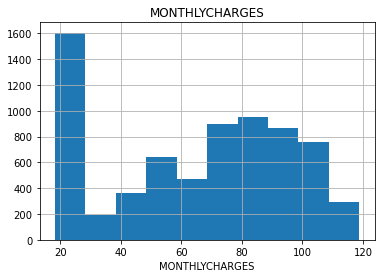

In [7]:
def numSummary(dataframe, numericalCol, plot=False):
    quantiles = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99, 1]
    print(dataframe[numericalCol].describe(quantiles).T)
    
    if plot:
        dataframe[numericalCol].hist()
        plt.xlabel(numericalCol)
        plt.title(numericalCol)
        plt.show(block=True)

for col in numCols:
    print(f"{col}:")
    numSummary(df, col, True)

        GENDER     Ratio
Male      3555  50.47565
Female    3488  49.52435
##########################################


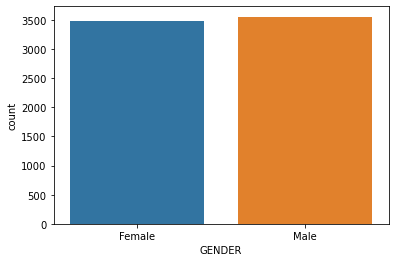

     PARTNER     Ratio
No      3641  51.69672
Yes     3402  48.30328
##########################################


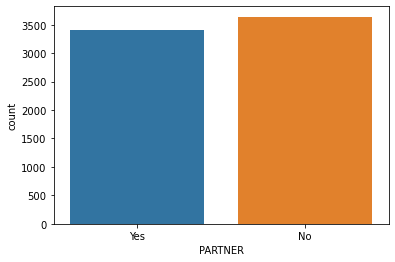

     DEPENDENTS      Ratio
No         4933  70.041176
Yes        2110  29.958824
##########################################


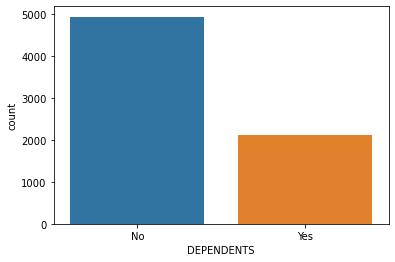

     PHONESERVICE      Ratio
Yes          6361  90.316626
No            682   9.683374
##########################################


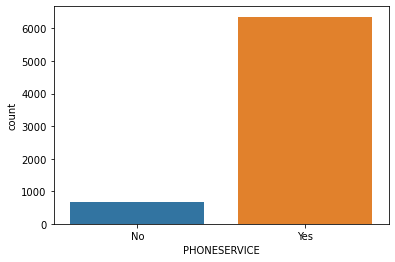

                  MULTIPLELINES      Ratio
No                         3390  48.132898
Yes                        2971  42.183729
No phone service            682   9.683374
##########################################


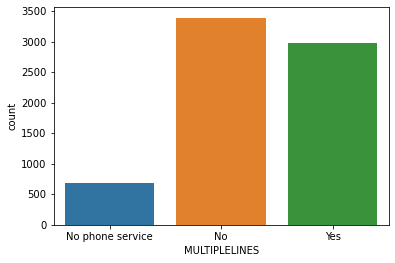

             INTERNETSERVICE      Ratio
Fiber optic             3096  43.958540
DSL                     2421  34.374556
No                      1526  21.666903
##########################################


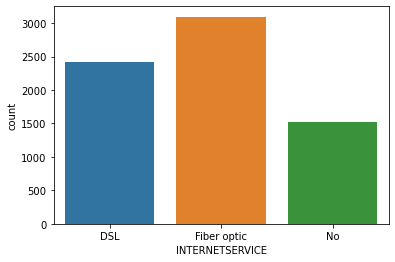

                     ONLINESECURITY      Ratio
No                             3498  49.666335
Yes                            2019  28.666761
No internet service            1526  21.666903
##########################################


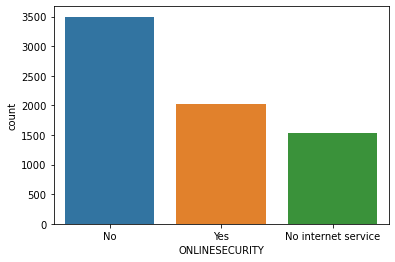

                     ONLINEBACKUP      Ratio
No                           3088  43.844952
Yes                          2429  34.488144
No internet service          1526  21.666903
##########################################


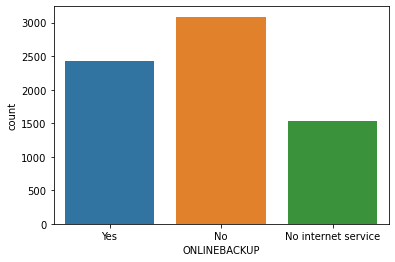

                     DEVICEPROTECTION      Ratio
No                               3095  43.944342
Yes                              2422  34.388755
No internet service              1526  21.666903
##########################################


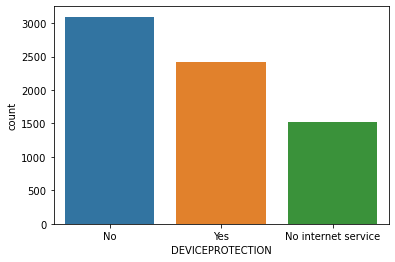

                     TECHSUPPORT      Ratio
No                          3473  49.311373
Yes                         2044  29.021724
No internet service         1526  21.666903
##########################################


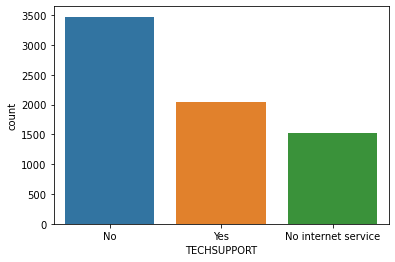

                     STREAMINGTV      Ratio
No                          2810  39.897771
Yes                         2707  38.435326
No internet service         1526  21.666903
##########################################


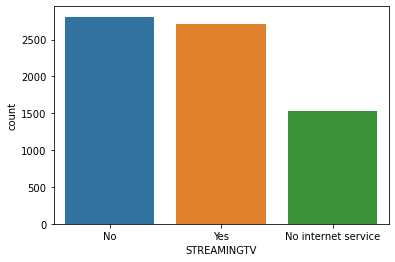

                     STREAMINGMOVIES      Ratio
No                              2785  39.542808
Yes                             2732  38.790288
No internet service             1526  21.666903
##########################################


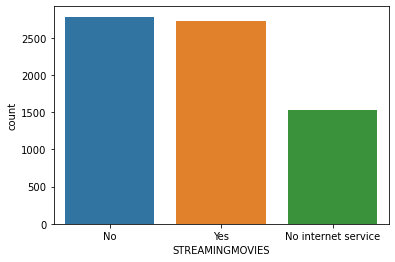

                CONTRACT      Ratio
Month-to-month      3875  55.019168
Two year            1695  24.066449
One year            1473  20.914383
##########################################


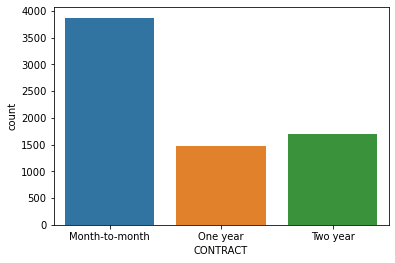

     PAPERLESSBILLING      Ratio
Yes              4171  59.221922
No               2872  40.778078
##########################################


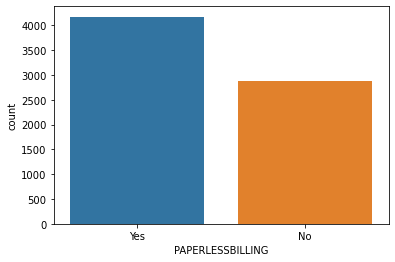

                           PAYMENTMETHOD      Ratio
Electronic check                    2365  33.579441
Mailed check                        1612  22.887974
Bank transfer (automatic)           1544  21.922476
Credit card (automatic)             1522  21.610109
##########################################


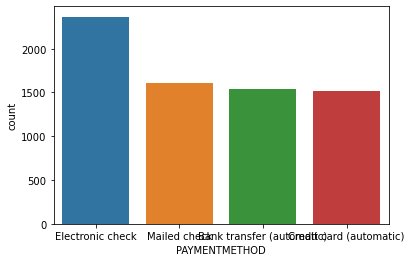

     CHURN      Ratio
No    5174  73.463013
Yes   1869  26.536987
##########################################


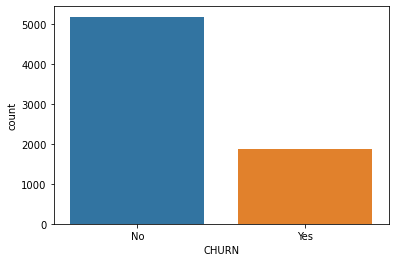

   SENIORCITIZEN      Ratio
0           5901  83.785319
1           1142  16.214681
##########################################


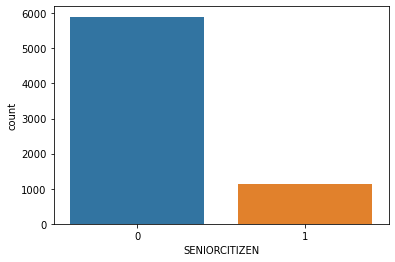

In [8]:
def catSummary(dataframe, colName, plot=False):
    print(pd.DataFrame({colName: dataframe[colName].value_counts(),
                        "Ratio": 100 * dataframe[colName].value_counts() / len(dataframe)}))
    print("##########################################")

    if plot:
        sns.countplot(x=dataframe[colName], data=dataframe)
        plt.show(block=True)
    
for col in catCols:
    if df[col].dtypes == "bool":
        print(col)
    else:
        catSummary(df, col, True)

In [9]:
df.head()

,CUSTOMERID,GENDER,SENIORCITIZEN,PARTNER,DEPENDENTS,TENURE,PHONESERVICE,MULTIPLELINES,INTERNETSERVICE,ONLINESECURITY,...,DEVICEPROTECTION,TECHSUPPORT,STREAMINGTV,STREAMINGMOVIES,CONTRACT,PAPERLESSBILLING,PAYMENTMETHOD,MONTHLYCHARGES,TOTALCHARGES,CHURN
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Adım 4: Hedef değişken analizi yapınız. (Kategorik değişkenlere göre hedef değişkenin ortalaması, hedef değişkene göre numerik değişkenlerin ortalaması)


In [10]:
def targetSummaryWithCat(dataframe, target, numCol):
    print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(numCol)[target].mean()}), end="\n\n\n")
    
def targetSummaryWithNum(dataframe, target, numCol):
    print(dataframe.groupby(target).agg({numCol: "mean"}), end="\n\n\n")
    
df['CHURN'] = np.where((df['CHURN'] == 'Yes'), 1, 0)


In [11]:

for col in numCols:
    targetSummaryWithNum(df, 'CHURN', col)

          TENURE
CHURN           
0      37.569965
1      17.979133


       MONTHLYCHARGES
CHURN                
0           61.265124
1           74.441332




In [12]:
catCols, numCols, catButCar = grabColNames(df)

Observations: 7043
Variables: 21
catCols: 17
numCols: 2
catButCar: 2
numButCat: 2


Adım 5: Aykırı gözlem analizi yapınız.


In [13]:
def outlierThresholds(dataframe, colName, q1=0.25, q3=0.75):
    quartile1 = dataframe[colName].quantile(q1)
    quartile3 = dataframe[colName].quantile(q3)
    interquantileRange = quartile3 - quartile1
    upLimit = quartile3 + 1.5 * interquantileRange
    lowLimit = quartile1 - 1.5 * interquantileRange
    return lowLimit, upLimit

def checkOutlier(dataframe, colName):
    lowLimit, upLimit = outlierThresholds(dataframe, colName)
    if dataframe[(dataframe[colName] > upLimit) | (dataframe[colName] < lowLimit)].any(axis=None):
        return True
    else:
        return False

In [14]:
for col in numCols:
    print(col, "-->", checkOutlier(df, col))

TENURE --> False
MONTHLYCHARGES --> False


In [15]:
for col in numCols:
    print(col,outlierThresholds(df, col))

TENURE (-60.0, 124.0)
MONTHLYCHARGES (-46.02499999999999, 171.375)


In [16]:
def grabOutliers(dataframe, colName, index=False):
    low, up = outlierThresholds(dataframe, colName)

    if dataframe[((dataframe[colName] < low) | (dataframe[colName] > up))].shape[0] > 10:
        print(display(dataframe[((dataframe[colName] < low) | (dataframe[colName] > up))].head()))
    else:
        print((dataframe[((dataframe[colName] < low) | (dataframe[colName] > up))]))

    if index:
        outlier_index = dataframe[((dataframe[colName] < low) | (dataframe[colName] > up))].index
        return outlier_index
for col in numCols:
    print(col, grabOutliers(df, col, True))

Empty DataFrame
Columns: [CUSTOMERID, GENDER, SENIORCITIZEN, PARTNER, DEPENDENTS, TENURE, PHONESERVICE, MULTIPLELINES, INTERNETSERVICE, ONLINESECURITY, ONLINEBACKUP, DEVICEPROTECTION, TECHSUPPORT, STREAMINGTV, STREAMINGMOVIES, CONTRACT, PAPERLESSBILLING, PAYMENTMETHOD, MONTHLYCHARGES, TOTALCHARGES, CHURN]
Index: []

[0 rows x 21 columns]
TENURE Int64Index([], dtype='int64')
Empty DataFrame
Columns: [CUSTOMERID, GENDER, SENIORCITIZEN, PARTNER, DEPENDENTS, TENURE, PHONESERVICE, MULTIPLELINES, INTERNETSERVICE, ONLINESECURITY, ONLINEBACKUP, DEVICEPROTECTION, TECHSUPPORT, STREAMINGTV, STREAMINGMOVIES, CONTRACT, PAPERLESSBILLING, PAYMENTMETHOD, MONTHLYCHARGES, TOTALCHARGES, CHURN]
Index: []

[0 rows x 21 columns]
MONTHLYCHARGES Int64Index([], dtype='int64')


Adım 6: Eksik gözlem analizi yapınız.


In [17]:
def missingValuesTable(dataframe,naName = False):
    naColums = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    nMiss = dataframe[naColums].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[naColums].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missingDf = pd.concat([nMiss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missingDf,end='\n')
    if naName:
        return naColums
missingValuesTable(df)

Empty DataFrame
Columns: [n_miss, ratio]
Index: []


Adım 7: Korelasyon analizi yapınız.

In [18]:
corr = df[numCols].corr()
corr

,TENURE,MONTHLYCHARGES
TENURE,1.0000,0.2479
MONTHLYCHARGES,0.2479,1.0000


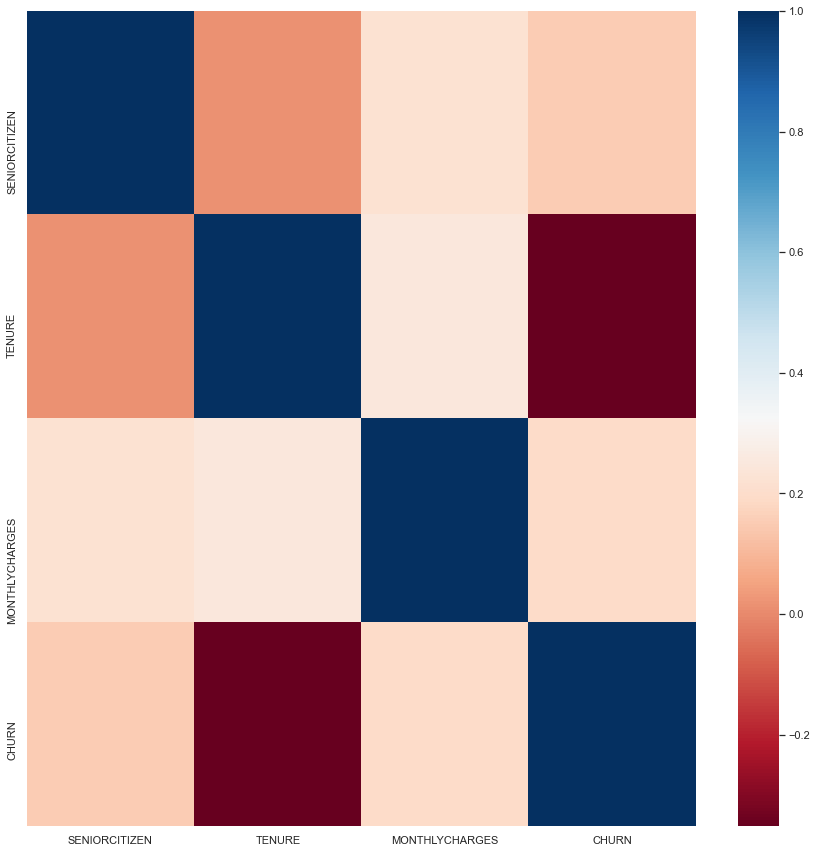

[]

In [19]:
def highCorrelatedCols(dataframe, plot=False, corr_th=0.90):
    corr = dataframe.corr()
    corrMatrix = corr.abs()
    upperTriangleMatrix = corrMatrix.where(np.triu(np.ones(corrMatrix.shape), k=1).astype(bool))
    dropList = [col for col in upperTriangleMatrix.columns if any(upperTriangleMatrix[col] > corr_th)]
    if plot:
        import seaborn as sns
        import matplotlib.pyplot as plt
        sns.set(rc={'figure.figsize': (15, 15)})
        sns.heatmap(corr, cmap="RdBu")
        plt.show()
    return dropList
highCorrelatedCols(df,True)

# Görev 2
Adım 1: Eksik ve aykırı gözlemler için gerekli işlemleri yapınız.


In [20]:
df.skew(skipna=True)

SENIORCITIZEN     1.833633
TENURE            0.239540
MONTHLYCHARGES   -0.220524
CHURN             1.063031
dtype: float64

In [21]:
df = df.apply(lambda x: x.fillna(x.mean()) if x.dtype != "O" else x, axis=0)
df = df.apply(lambda x: x.fillna(x.mode()[0]) if (x.dtype == "O" and len(x.unique()) <= 10) else x, axis=0)
df.isnull().sum()

CUSTOMERID          0
GENDER              0
SENIORCITIZEN       0
PARTNER             0
DEPENDENTS          0
TENURE              0
PHONESERVICE        0
MULTIPLELINES       0
INTERNETSERVICE     0
ONLINESECURITY      0
ONLINEBACKUP        0
DEVICEPROTECTION    0
TECHSUPPORT         0
STREAMINGTV         0
STREAMINGMOVIES     0
CONTRACT            0
PAPERLESSBILLING    0
PAYMENTMETHOD       0
MONTHLYCHARGES      0
TOTALCHARGES        0
CHURN               0
dtype: int64

In [22]:
def missingVsTarget(dataframe, target, naColumns):
    tempDf = dataframe.copy()
    for col in naColumns:
        tempDf[col + '_NA_FLAG'] = np.where(tempDf[col].isnull(), 1, 0)
    naFlags = tempDf.loc[:, tempDf.columns.str.contains('_NA_')].columns
    for col in naFlags:
        print(pd.DataFrame({'TARGET_MEAN': tempDf.groupby(col)[target].mean(),
                            'Count': tempDf.groupby(col)[target].count()}), end='\n\n\n')

In [23]:

zeroToNanCols = ['SENIORCITIZEN', 'CHURN']
for col in zeroToNanCols:
    df[col] = df[col].replace({'0':np.nan, 0:np.nan})
    
missingValuesTable(df)


               n_miss  ratio
SENIORCITIZEN    5901  83.79
CHURN            5174  73.46


In [24]:
df["CHURN"].fillna(df["CHURN"].mean(), inplace=True)
df["SENIORCITIZEN"].fillna(df["SENIORCITIZEN"].mean(), inplace=True)

In [25]:
missingVsTarget(df, 'CHURN', zeroToNanCols)

                       TARGET_MEAN  Count
SENIORCITIZEN_NA_FLAG                    
0                              1.0   7043


               TARGET_MEAN  Count
CHURN_NA_FLAG                    
0                      1.0   7043




In [26]:
def replaceWithThresholds(dataframe, colName):
    low, up = outlierThresholds(dataframe, colName)

    dataframe.loc[dataframe[colName] > up, colName] = up
    dataframe.loc[dataframe[colName] < low, colName] = low
    
for col in numCols:
    replaceWithThresholds(df, col)
for col in numCols:
    print(col, checkOutlier(df, col))

TENURE False
MONTHLYCHARGES False


Adım 2: Yeni değişkenler oluşturunuz.


In [27]:
numCols

['TENURE', 'MONTHLYCHARGES']

Adım 3: Encoding işlemlerini gerçekleştiriniz.


In [28]:
def labelEncoder(dataframe, binaryCol):
    labelencoder = LabelEncoder()
    dataframe[binaryCol] = labelencoder.fit_transform(dataframe[binaryCol])
    return dataframe

In [29]:
binaryCols = [col for col in df.columns if df[col].dtype not in [int, float] and df[col].nunique() == 2]
binaryCols

['GENDER', 'PARTNER', 'DEPENDENTS', 'PHONESERVICE', 'PAPERLESSBILLING']

In [30]:
for col in binaryCols:
    labelEncoder(df, col)
df.head()

,CUSTOMERID,GENDER,SENIORCITIZEN,PARTNER,DEPENDENTS,TENURE,PHONESERVICE,MULTIPLELINES,INTERNETSERVICE,ONLINESECURITY,...,DEVICEPROTECTION,TECHSUPPORT,STREAMINGTV,STREAMINGMOVIES,CONTRACT,PAPERLESSBILLING,PAYMENTMETHOD,MONTHLYCHARGES,TOTALCHARGES,CHURN
0,7590-VHVEG,0,1.0,1,0,1.0,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,1.0
1,5575-GNVDE,1,1.0,0,0,34.0,1,No,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.5,1.0
2,3668-QPYBK,1,1.0,0,0,2.0,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1.0
3,7795-CFOCW,1,1.0,0,0,45.0,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,1.0
4,9237-HQITU,0,1.0,0,0,2.0,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1.0


In [31]:
def rareAnalyzer(dataframe, target, catCols):
    for col in  catCols:
        print(col,":",len(dataframe[col].value_counts()))
        print(pd.DataFrame({"COUNT": dataframe[col].value_counts(),"RATIO": dataframe[col].value_counts() / len(dataframe),"TARGET_MEAN": dataframe.groupby(col)[target].mean()}), end="\n\n\n")
rareAnalyzer(df, 'CHURN', binaryCols)

GENDER : 2
   COUNT     RATIO  TARGET_MEAN
0   3488  0.495244          1.0
1   3555  0.504756          1.0


PARTNER : 2
   COUNT     RATIO  TARGET_MEAN
0   3641  0.516967          1.0
1   3402  0.483033          1.0


DEPENDENTS : 2
   COUNT     RATIO  TARGET_MEAN
0   4933  0.700412          1.0
1   2110  0.299588          1.0


PHONESERVICE : 2
   COUNT     RATIO  TARGET_MEAN
0    682  0.096834          1.0
1   6361  0.903166          1.0


PAPERLESSBILLING : 2
   COUNT     RATIO  TARGET_MEAN
0   2872  0.407781          1.0
1   4171  0.592219          1.0




In [32]:
def rareEncoder(dataframe, rarePerc):
    tempDf = dataframe.copy()
    rare_columns = [col for col in tempDf.columns if tempDf[col].dtypes == "O" and (tempDf[col].value_counts() / len(tempDf) < rarePerc).any(axis = None)]
    for var in rare_columns:
        tmp = tempDf[var].value_counts() / len(tempDf)
        rareLabels = tmp[tmp < rarePerc].index
        tempDf[var] = np.where(tempDf[var].isin(rareLabels), "Rare", tempDf[var])
    return tempDf

In [33]:
newDf = rareEncoder(df, 0.01)

In [34]:
def oneHotEncoder(dataframe, categoricalCols, drop_first = False):
    dataframe = pd.get_dummies(dataframe, columns=categoricalCols,drop_first=drop_first)
    return dataframe
oheCols = [col for col in df.columns if 10 >= df[col].nunique() > 2]
oheCols

['MULTIPLELINES',
 'INTERNETSERVICE',
 'ONLINESECURITY',
 'ONLINEBACKUP',
 'DEVICEPROTECTION',
 'TECHSUPPORT',
 'STREAMINGTV',
 'STREAMINGMOVIES',
 'CONTRACT',
 'PAYMENTMETHOD']

In [35]:
df = oneHotEncoder(df, oheCols)
df.head()

,CUSTOMERID,GENDER,SENIORCITIZEN,PARTNER,DEPENDENTS,TENURE,PHONESERVICE,PAPERLESSBILLING,MONTHLYCHARGES,TOTALCHARGES,...,STREAMINGMOVIES_No,STREAMINGMOVIES_No internet service,STREAMINGMOVIES_Yes,CONTRACT_Month-to-month,CONTRACT_One year,CONTRACT_Two year,PAYMENTMETHOD_Bank transfer (automatic),PAYMENTMETHOD_Credit card (automatic),PAYMENTMETHOD_Electronic check,PAYMENTMETHOD_Mailed check
0,7590-VHVEG,0,1.0,1,0,1.0,0,1,29.85,29.85,...,1,0,0,1,0,0,0,0,1,0
1,5575-GNVDE,1,1.0,0,0,34.0,1,0,56.95,1889.5,...,1,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,1,1.0,0,0,2.0,1,1,53.85,108.15,...,1,0,0,1,0,0,0,0,0,1
3,7795-CFOCW,1,1.0,0,0,45.0,0,0,42.30,1840.75,...,1,0,0,0,1,0,1,0,0,0
4,9237-HQITU,0,1.0,0,0,2.0,1,1,70.70,151.65,...,1,0,0,1,0,0,0,0,1,0


Adım 4: Numerik değişkenler için standartlaştırma yapınız.


In [36]:
scaler = StandardScaler()
df[numCols] = scaler.fit_transform(df[numCols])
df[numCols].head()

,TENURE,MONTHLYCHARGES
0,-1.277445,-1.160323
1,0.066327,-0.259629
2,-1.236724,-0.362660
3,0.514251,-0.746535
4,-1.236724,0.197365


In [37]:
df.columns

Index(['CUSTOMERID', 'GENDER', 'SENIORCITIZEN', 'PARTNER', 'DEPENDENTS',
       'TENURE', 'PHONESERVICE', 'PAPERLESSBILLING', 'MONTHLYCHARGES',
       'TOTALCHARGES', 'CHURN', 'MULTIPLELINES_No',
       'MULTIPLELINES_No phone service', 'MULTIPLELINES_Yes',
       'INTERNETSERVICE_DSL', 'INTERNETSERVICE_Fiber optic',
       'INTERNETSERVICE_No', 'ONLINESECURITY_No',
       'ONLINESECURITY_No internet service', 'ONLINESECURITY_Yes',
       'ONLINEBACKUP_No', 'ONLINEBACKUP_No internet service',
       'ONLINEBACKUP_Yes', 'DEVICEPROTECTION_No',
       'DEVICEPROTECTION_No internet service', 'DEVICEPROTECTION_Yes',
       'TECHSUPPORT_No', 'TECHSUPPORT_No internet service', 'TECHSUPPORT_Yes',
       'STREAMINGTV_No', 'STREAMINGTV_No internet service', 'STREAMINGTV_Yes',
       'STREAMINGMOVIES_No', 'STREAMINGMOVIES_No internet service',
       'STREAMINGMOVIES_Yes', 'CONTRACT_Month-to-month', 'CONTRACT_One year',
       'CONTRACT_Two year', 'PAYMENTMETHOD_Bank transfer (automatic)',
      

Adım 5: Model oluşturunuz

In [41]:
df['TOTALCHARGES'] = pd.to_numeric(df['TOTALCHARGES'], errors='coerce')
df.dropna(inplace=True)

In [42]:
y = df["CHURN"]
X = df.drop(['CHURN', 'CUSTOMERID'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)
rf_model = RandomForestClassifier(random_state=46).fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
accuracy_score(y_pred, y_test)

1.0

In [46]:
df.head()

,CUSTOMERID,GENDER,SENIORCITIZEN,PARTNER,DEPENDENTS,TENURE,PHONESERVICE,PAPERLESSBILLING,MONTHLYCHARGES,TOTALCHARGES,...,STREAMINGMOVIES_No,STREAMINGMOVIES_No internet service,STREAMINGMOVIES_Yes,CONTRACT_Month-to-month,CONTRACT_One year,CONTRACT_Two year,PAYMENTMETHOD_Bank transfer (automatic),PAYMENTMETHOD_Credit card (automatic),PAYMENTMETHOD_Electronic check,PAYMENTMETHOD_Mailed check
0,7590-VHVEG,0,1.0,1,0,-1.277445,0,1,-1.160323,29.85,...,1,0,0,1,0,0,0,0,1,0
1,5575-GNVDE,1,1.0,0,0,0.066327,1,0,-0.259629,1889.50,...,1,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,1,1.0,0,0,-1.236724,1,1,-0.362660,108.15,...,1,0,0,1,0,0,0,0,0,1
3,7795-CFOCW,1,1.0,0,0,0.514251,0,0,-0.746535,1840.75,...,1,0,0,0,1,0,1,0,0,0
4,9237-HQITU,0,1.0,0,0,-1.236724,1,1,0.197365,151.65,...,1,0,0,1,0,0,0,0,1,0
